# WeatherPy

---


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | nisia floresta
Processing Record 4 of Set 1 | la ronge
Processing Record 5 of Set 1 | gobabis
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | lakatoro
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | muscat
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | karaul
City not found. Skipping...
Processing Record 16 of Set 1 | roald
Processing Record 17 of Set 1 | panacan
Processing Record 18 of Set 1 | samusu
City not found. Skipping...
Processing Record 19 of Set 1 | nouadhibou
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | n

Processing Record 34 of Set 4 | kailua
Processing Record 35 of Set 4 | san felipe
Processing Record 36 of Set 4 | murgab
Processing Record 37 of Set 4 | harpanahalli
Processing Record 38 of Set 4 | bemban
Processing Record 39 of Set 4 | tevriz
Processing Record 40 of Set 4 | krasnoselkup
Processing Record 41 of Set 4 | makakilo city
Processing Record 42 of Set 4 | upernavik
Processing Record 43 of Set 4 | pueblo nuevo
Processing Record 44 of Set 4 | rocha
Processing Record 45 of Set 4 | makinsk
Processing Record 46 of Set 4 | maldonado
Processing Record 47 of Set 4 | hobart
Processing Record 48 of Set 4 | kyzyl
Processing Record 49 of Set 4 | leshukonskoye
Processing Record 0 of Set 5 | cayenne
Processing Record 1 of Set 5 | khatanga
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | tiksi
Processing Record 4 of Set 5 | whitehorse
Processing Record 5 of Set 5 | lorengau
Processing Record 6 of Set 5 | buala
Processing Record 7 of Set 5 | yuancheng
Processing Reco

Processing Record 27 of Set 8 | maceio
Processing Record 28 of Set 8 | port moresby
Processing Record 29 of Set 8 | port hedland
Processing Record 30 of Set 8 | rosetown
Processing Record 31 of Set 8 | hami
Processing Record 32 of Set 8 | gat
Processing Record 33 of Set 8 | eydhafushi
Processing Record 34 of Set 8 | mbanza-ngungu
Processing Record 35 of Set 8 | puerto narino
Processing Record 36 of Set 8 | mackay
Processing Record 37 of Set 8 | ostrovnoy
Processing Record 38 of Set 8 | kolosovka
Processing Record 39 of Set 8 | kamenka
Processing Record 40 of Set 8 | katobu
Processing Record 41 of Set 8 | jesus carranza
Processing Record 42 of Set 8 | batagay
Processing Record 43 of Set 8 | broken hill
Processing Record 44 of Set 8 | buraydah
Processing Record 45 of Set 8 | tahta
Processing Record 46 of Set 8 | okato
Processing Record 47 of Set 8 | monrovia
Processing Record 48 of Set 8 | trinidad
Processing Record 49 of Set 8 | deniliquin
Processing Record 0 of Set 9 | kaitangata
Proce

Processing Record 16 of Set 12 | lubao
Processing Record 17 of Set 12 | mamit
Processing Record 18 of Set 12 | dinanagar
Processing Record 19 of Set 12 | airai
Processing Record 20 of Set 12 | praia da vitoria
Processing Record 21 of Set 12 | junagarh
Processing Record 22 of Set 12 | aswan
Processing Record 23 of Set 12 | khonsa
Processing Record 24 of Set 12 | quang ngai
Processing Record 25 of Set 12 | tashtyp
Processing Record 26 of Set 12 | linxia
Processing Record 27 of Set 12 | zyryanka
Processing Record 28 of Set 12 | manali
Processing Record 29 of Set 12 | ndioum
Processing Record 30 of Set 12 | ercis
Processing Record 31 of Set 12 | rantauprapat
Processing Record 32 of Set 12 | mana
Processing Record 33 of Set 12 | ambilobe
Processing Record 34 of Set 12 | north bend
Processing Record 35 of Set 12 | itoman
Processing Record 36 of Set 12 | rubiataba
Processing Record 37 of Set 12 | bolivar
Processing Record 38 of Set 12 | trelew
Processing Record 39 of Set 12 | kamenskoye
City 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,-1.47,55,98,1.79,US,1675195075
1,east london,-33.0153,27.9116,23.45,87,67,7.40,ZA,1675195218
2,nisia floresta,-6.0911,-35.2086,29.45,65,99,5.36,BR,1675195432
3,la ronge,55.1001,-105.2842,-23.86,53,20,1.54,CA,1675195434
4,gobabis,-22.4500,18.9667,22.36,66,85,3.83,NA,1675195434


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,-1.47,55,98,1.79,US,1675195075
1,east london,-33.0153,27.9116,23.45,87,67,7.40,ZA,1675195218
2,nisia floresta,-6.0911,-35.2086,29.45,65,99,5.36,BR,1675195432
3,la ronge,55.1001,-105.2842,-23.86,53,20,1.54,CA,1675195434
4,gobabis,-22.4500,18.9667,22.36,66,85,3.83,NaN,1675195434


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

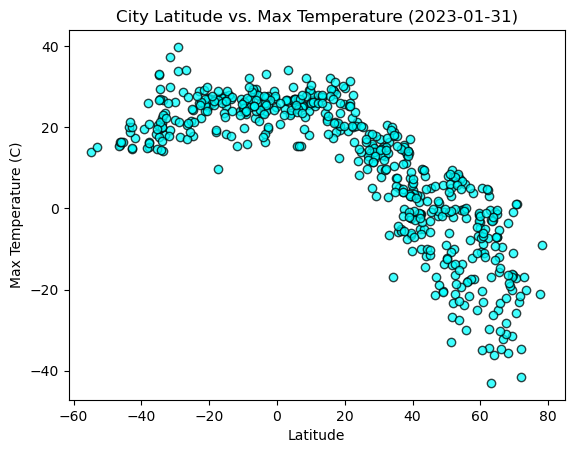

In [22]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x, y, marker="o",facecolors="aqua",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-01-31)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

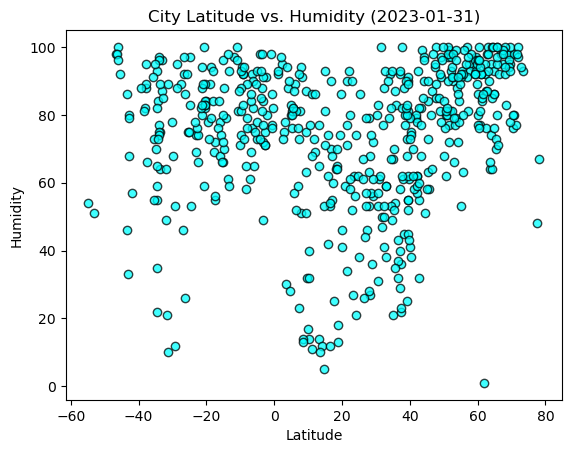

In [24]:
# Build the scatter plots for latitude vs. humidity
x_1 = city_data_df["Lat"]
y_1 = city_data_df["Humidity"]
plt.scatter(x_1, y_1, marker="o",facecolors="aqua",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-01-31)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

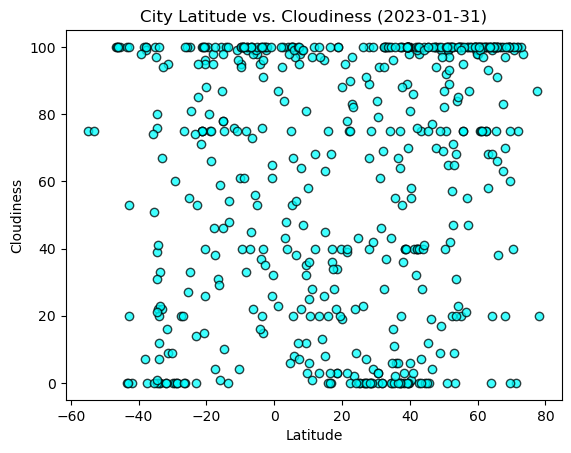

In [26]:
# Build the scatter plots for latitude vs. cloudiness
x_2 = city_data_df["Lat"]
y_2 = city_data_df["Cloudiness"]
plt.scatter(x_2, y_2, marker="o",facecolors="aqua",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-01-31)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

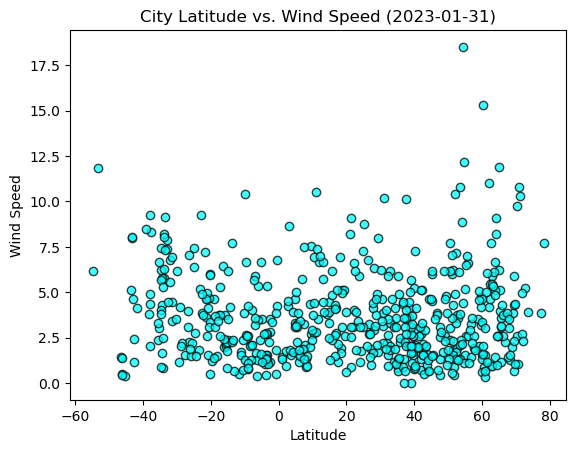

In [28]:
# Build the scatter plots for latitude vs. wind speed
x_3 = city_data_df["Lat"]
y_3 = city_data_df["Wind Speed"]
plt.scatter(x_3, y_3, marker="o",facecolors="aqua",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-01-31)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [71]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=12, color='red')
    plt.ylabel(title)
    plt.xlabel('Latitude')
    print(f'The r-squared is: {rvalue**2}')
    plt.show()

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,-1.47,55,98,1.79,US,1675195075
3,la ronge,55.1001,-105.2842,-23.86,53,20,1.54,CA,1675195434
8,dikson,73.5069,80.5464,-20.14,93,98,3.90,RU,1675195437
10,ribeira grande,38.5167,-28.7000,14.22,77,40,3.60,PT,1675195438
11,hilo,19.7297,-155.0900,25.71,86,40,2.57,US,1675194970


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,east london,-33.0153,27.9116,23.45,87,67,7.40,ZA,1675195218
2,nisia floresta,-6.0911,-35.2086,29.45,65,99,5.36,BR,1675195432
4,gobabis,-22.4500,18.9667,22.36,66,85,3.83,NaN,1675195434
5,ushuaia,-54.8000,-68.3000,13.81,54,75,6.17,AR,1675195182
6,lakatoro,-16.0999,167.4164,26.86,78,59,1.98,VU,1675195436


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7250507365158313


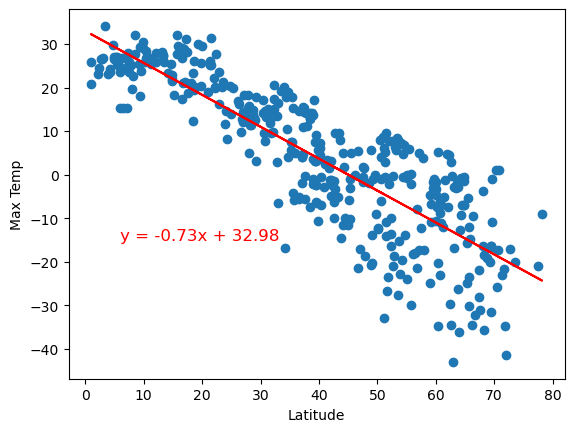

In [108]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-15))


The r-squared is: 0.16761981586632002


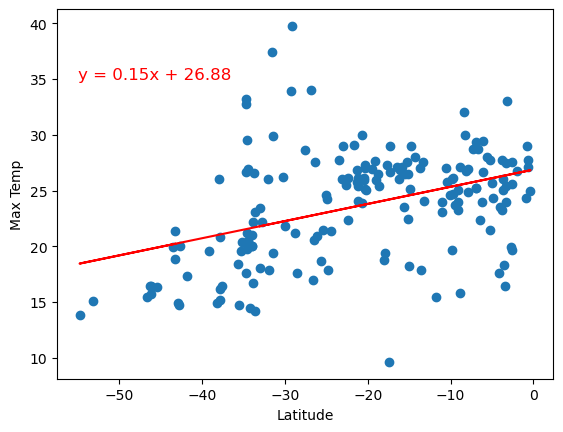

In [88]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-55,35))

**Discussion about the linear relationship:** 
For the Northern Hemisphere, there is a negative correlation between Max Temperature and Latitude; meaning that the greater the Latitude (further from the equator) the lower the Max Temperature is. 
For the Sothern Hemisphere, there is a positve correlation between Max Temperature and Latitude; meaning that the greater the Latitude (closer the the equator) the higher the Max Temperature is.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.19595642317227605


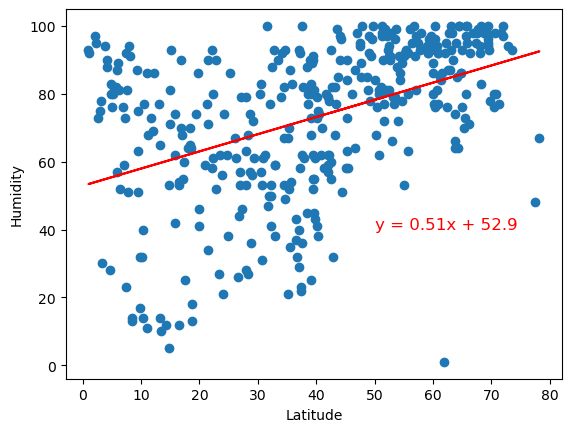

In [105]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Humidity",(50,40))

The r-squared is: 0.03488410236550653


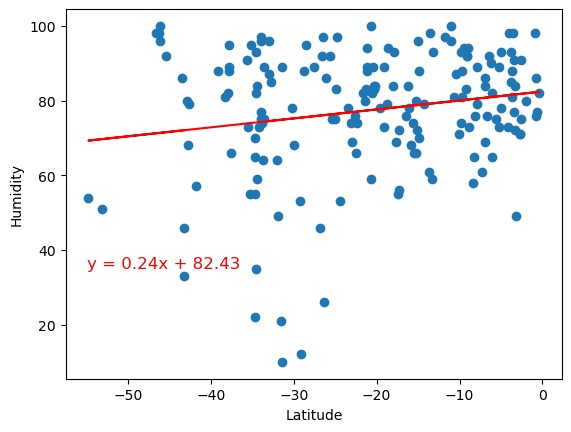

In [84]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Humidity",(-55,35))

**Discussion about the linear relationship:** 
There is a greater positive coorelation between Humidity and Latitude for the Northern Hemisphere than the Southern Hemisphere. However, there appears to be a number of outliers in both the Northern and Southern Hemisphere data which leads me to believe that another factor could be linked to the Humidity of a location.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.09258651796024306


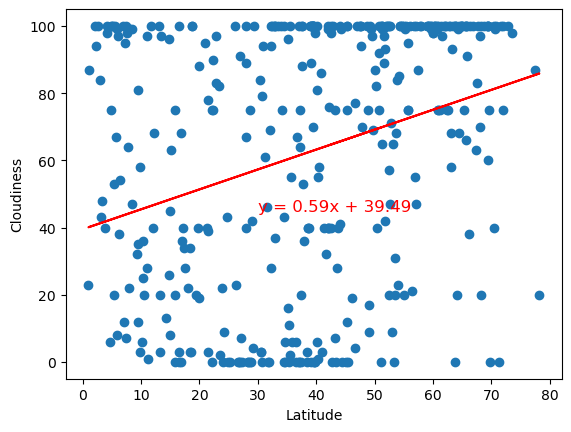

In [109]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Cloudiness",(30,45))

The r-squared is: 0.052367659211049425


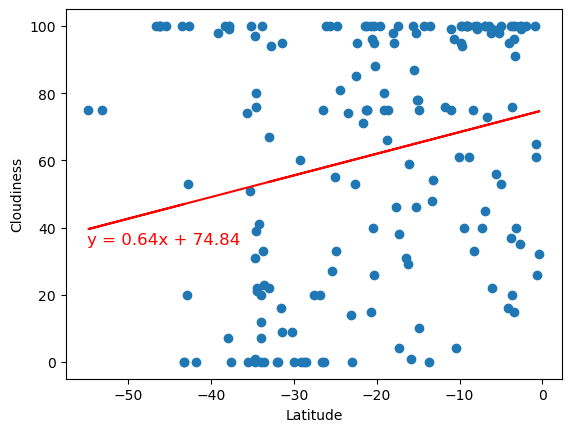

In [85]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Cloudiness",(-55,35))

**Discussion about the linear relationship:** 
There does not seems to be a strong correlation between Cloudienss and Latitude. Perhaps there is another factor affecting cloudienss. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.005252386684647691


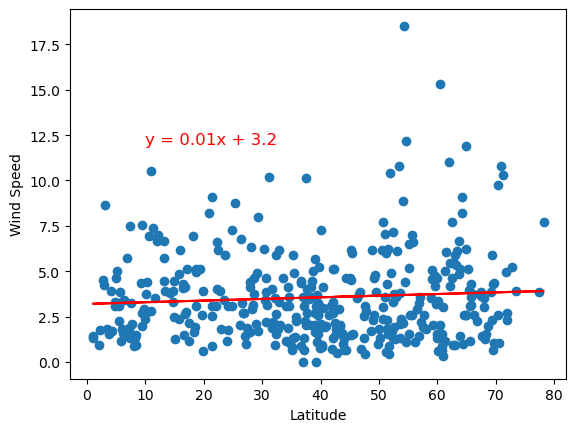

In [106]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Wind Speed",(10,12))

The r-squared is: 0.11651942781497353


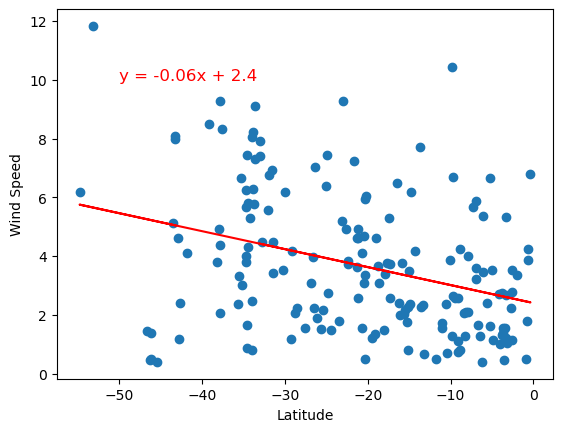

In [107]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Wind Speed",(-50,10))

**Discussion about the linear relationship:** 
There does not appear to be strong enough evidence of correlation between wind speed and latitude for either Northern or Southern Hemisphere's.